<a href="https://colab.research.google.com/github/davidlealo/sic_ai_2025_jun/blob/main/03machinelearning%20/clase_8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🎯 Sesgo y Varianza en Machine Learning

En el entrenamiento de modelos de machine learning supervisado, es importante entender dos conceptos fundamentales: **sesgo (bias)** y **varianza (variance)**. Ambos están relacionados con la capacidad del modelo para generalizar a nuevos datos.

---

## 🔹 ¿Qué es el **sesgo**?

- El **sesgo** mide cuán lejos están las predicciones del modelo respecto al valor real objetivo.
- Un **sesgo alto** ocurre cuando el modelo es demasiado simple para captar la complejidad de los datos (por ejemplo, una regresión lineal sobre un patrón no lineal).
- Un **sesgo bajo** indica que el modelo representa bien la relación entre variables.

---

## 🔹 ¿Qué es la **varianza**?

- La **varianza** mide cuánto cambian las predicciones del modelo al usar diferentes datos de entrenamiento.
- Una **varianza alta** indica que el modelo se ajusta demasiado a los datos de entrenamiento (sobreajuste).
- Una **varianza baja** muestra que el modelo es más estable frente a diferentes muestras.

---

## 📊 Relación entre Sesgo y Varianza

|                        | Baja Varianza                         | Alta Varianza                         |
|------------------------|---------------------------------------|---------------------------------------|
| **Alta Predisposición (Sesgo Alto)** | Predicciones agrupadas pero lejos del objetivo (error sistemático). | Predicciones dispersas y lejos del objetivo. |
| **Baja Predisposición (Sesgo Bajo)** | Predicciones agrupadas y cercanas al objetivo (lo ideal). | Predicciones dispersas alrededor del objetivo. |

---

## ⚖️ ¿Qué papel juegan las regularizaciones L1 y L2?

Las regularizaciones **L1 (Lasso)** y **L2 (Ridge)** son técnicas que ayudan a **limitar la complejidad del modelo**, para encontrar un equilibrio entre sesgo y varianza.

- **L1 Regularization (Lasso)**:
  - Tiende a reducir algunos coeficientes a cero (eliminación de variables).
  - Útil para modelos más simples y con menos variables.

- **L2 Regularization (Ridge)**:
  - Reduce todos los coeficientes sin llevarlos a cero.
  - Hace que el modelo sea más robusto y con menor varianza.

Ambas técnicas ayudan a evitar el **sobreajuste** y mejorar la **capacidad de generalización** del modelo.

---

## 🧠 Conclusión

- **Sesgo alto** → modelo demasiado simple.
- **Varianza alta** → modelo demasiado complejo.
- La clave está en encontrar un **buen equilibrio** (trade-off).
- Las técnicas de **regularización L1 y L2** son herramientas para controlar este equilibrio.



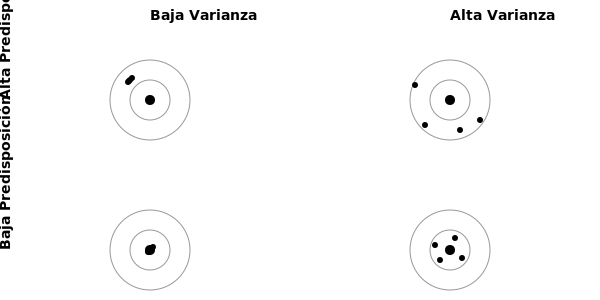

In [4]:
from IPython.display import SVG, display

svg_code = '''
<svg width="600" height="300" xmlns="http://www.w3.org/2000/svg">
  <style>
    .title { font: bold 14px sans-serif; }
    .label { font: 12px sans-serif; text-anchor: middle; }
  </style>

  <!-- Column titles -->
  <text x="150" y="20" class="title">Baja Varianza</text>
  <text x="450" y="20" class="title">Alta Varianza</text>

  <!-- Row titles -->
  <text x="10" y="100" class="title" transform="rotate(-90 10,100)">Alta Predisposición</text>
  <text x="10" y="250" class="title" transform="rotate(-90 10,250)">Baja Predisposición</text>

  <!-- Dianas (círculos) -->
  <!-- Alta predisposición - baja varianza -->
  <g transform="translate(150, 100)">
    <circle cx="0" cy="0" r="40" fill="none" stroke="#999" />
    <circle cx="0" cy="0" r="20" fill="none" stroke="#999" />
    <circle cx="0" cy="0" r="5" fill="black" />
    <circle cx="-20" cy="-20" r="3" fill="black" />
    <circle cx="-22" cy="-18" r="3" fill="black" />
    <circle cx="-18" cy="-22" r="3" fill="black" />
    <circle cx="-21" cy="-19" r="3" fill="black" />
  </g>

  <!-- Alta predisposición - alta varianza -->
  <g transform="translate(450, 100)">
    <circle cx="0" cy="0" r="40" fill="none" stroke="#999" />
    <circle cx="0" cy="0" r="20" fill="none" stroke="#999" />
    <circle cx="0" cy="0" r="5" fill="black" />
    <circle cx="30" cy="20" r="3" fill="black" />
    <circle cx="-35" cy="-15" r="3" fill="black" />
    <circle cx="10" cy="30" r="3" fill="black" />
    <circle cx="-25" cy="25" r="3" fill="black" />
  </g>

  <!-- Baja predisposición - baja varianza -->
  <g transform="translate(150, 250)">
    <circle cx="0" cy="0" r="40" fill="none" stroke="#999" />
    <circle cx="0" cy="0" r="20" fill="none" stroke="#999" />
    <circle cx="0" cy="0" r="5" fill="black" />
    <circle cx="3" cy="-3" r="3" fill="black" />
    <circle cx="-2" cy="2" r="3" fill="black" />
    <circle cx="1" cy="1" r="3" fill="black" />
    <circle cx="0" cy="0" r="3" fill="black" />
  </g>

  <!-- Baja predisposición - alta varianza -->
  <g transform="translate(450, 250)">
    <circle cx="0" cy="0" r="40" fill="none" stroke="#999" />
    <circle cx="0" cy="0" r="20" fill="none" stroke="#999" />
    <circle cx="0" cy="0" r="5" fill="black" />
    <circle cx="-15" cy="-5" r="3" fill="black" />
    <circle cx="12" cy="8" r="3" fill="black" />
    <circle cx="5" cy="-12" r="3" fill="black" />
    <circle cx="-10" cy="10" r="3" fill="black" />
  </g>
</svg>
'''

display(SVG(svg_code))


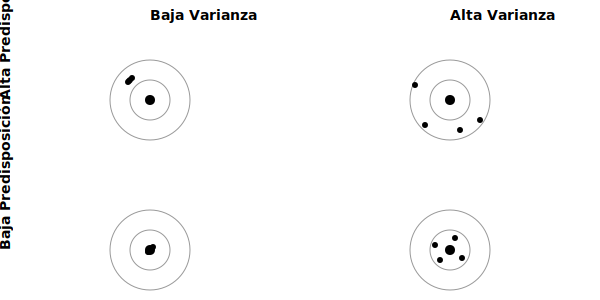

In [5]:
from IPython.display import SVG, display

svg_code = '''
<svg width="600" height="300" xmlns="http://www.w3.org/2000/svg">
  <style>
    .title { font: bold 14px sans-serif; }
    .label { font: 12px sans-serif; text-anchor: middle; }
  </style>

  <!-- Fondo blanco -->
  <rect x="0" y="0" width="600" height="300" fill="white" />

  <!-- Column titles -->
  <text x="150" y="20" class="title">Baja Varianza</text>
  <text x="450" y="20" class="title">Alta Varianza</text>

  <!-- Row titles -->
  <text x="10" y="100" class="title" transform="rotate(-90 10,100)">Alta Predisposición</text>
  <text x="10" y="250" class="title" transform="rotate(-90 10,250)">Baja Predisposición</text>

  <!-- Dianas -->
  <!-- Alta predisposición - baja varianza -->
  <g transform="translate(150, 100)">
    <circle cx="0" cy="0" r="40" fill="none" stroke="#999" />
    <circle cx="0" cy="0" r="20" fill="none" stroke="#999" />
    <circle cx="0" cy="0" r="5" fill="black" />
    <circle cx="-20" cy="-20" r="3" fill="black" />
    <circle cx="-22" cy="-18" r="3" fill="black" />
    <circle cx="-18" cy="-22" r="3" fill="black" />
    <circle cx="-21" cy="-19" r="3" fill="black" />
  </g>

  <!-- Alta predisposición - alta varianza -->
  <g transform="translate(450, 100)">
    <circle cx="0" cy="0" r="40" fill="none" stroke="#999" />
    <circle cx="0" cy="0" r="20" fill="none" stroke="#999" />
    <circle cx="0" cy="0" r="5" fill="black" />
    <circle cx="30" cy="20" r="3" fill="black" />
    <circle cx="-35" cy="-15" r="3" fill="black" />
    <circle cx="10" cy="30" r="3" fill="black" />
    <circle cx="-25" cy="25" r="3" fill="black" />
  </g>

  <!-- Baja predisposición - baja varianza -->
  <g transform="translate(150, 250)">
    <circle cx="0" cy="0" r="40" fill="none" stroke="#999" />
    <circle cx="0" cy="0" r="20" fill="none" stroke="#999" />
    <circle cx="0" cy="0" r="5" fill="black" />
    <circle cx="3" cy="-3" r="3" fill="black" />
    <circle cx="-2" cy="2" r="3" fill="black" />
    <circle cx="1" cy="1" r="3" fill="black" />
    <circle cx="0" cy="0" r="3" fill="black" />
  </g>

  <!-- Baja predisposición - alta varianza -->
  <g transform="translate(450, 250)">
    <circle cx="0" cy="0" r="40" fill="none" stroke="#999" />
    <circle cx="0" cy="0" r="20" fill="none" stroke="#999" />
    <circle cx="0" cy="0" r="5" fill="black" />
    <circle cx="-15" cy="-5" r="3" fill="black" />
    <circle cx="12" cy="8" r="3" fill="black" />
    <circle cx="5" cy="-12" r="3" fill="black" />
    <circle cx="-10" cy="10" r="3" fill="black" />
  </g>
</svg>
'''

display(SVG(svg_code))


## Videos de explicación

primer video
[![Mira el video en YouTube](https://img.youtube.com/vi/uomXFxBGMvA/0.jpg)](https://youtu.be/uomXFxBGMvA?si=tUrC_eczm_VcLMqQ)


segundo video
[![Mira el video en YouTube](https://img.youtube.com/vi/ezbDtmFIQPU/0.jpg)](https://youtu.be/ezbDtmFIQPU?si=0xLEPVzWbJXAh6Vd)



Puedes revisar también: [Artículo en medium que explica elastic net](https://medium.com/@abhishekjainindore24/elastic-net-regression-combined-features-of-l1-and-l2-regularization-6181a660c3a5)

## Ensayo con sk-learn

**DATOS**: Tengo registros y mediciones de distintas flores de iris

### Diferencias al ojo humano de la flor de iris

Fotos de muestra:
![Tipos de flor de iris: setosa, versicolor y virginica](https://www.sakurai.dev.br/assets/images/posts/2018-10-17-classificacao-iris-01.png)



otras fotos de muestra:
![Tipos de flor de iris: setosa, versicolor y virginica](https://miro.medium.com/v2/resize:fit:1400/1*f6KbPXwksAliMIsibFyGJw.png)


In [6]:
from sklearn.datasets import load_iris
iris=load_iris()
import pandas as pd
iris['data']


array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [7]:
iris['target']


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [8]:
iris_df = pd.DataFrame(iris['data'],
             columns=['Sepal_Length', 'Sepal_Width', 'Petal_Length', 'Petal_Width'])

In [9]:
iris_df

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [10]:
target = pd.DataFrame(iris.target, columns=['Species'])

In [11]:
target

,Species
0,0
1,0
2,0
3,0
4,0
...,...
145,2
146,2
147,2
148,2


In [12]:
df = pd.concat([iris_df, target], axis=1)

In [13]:
df

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [14]:
# Cambiar los valores de ela columna species por el target_name
df['Species'] = df['Species'].map({0: 'setosa', 1: 'versicolor', 2: 'virginica'})

In [15]:
df

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Sepal_Length  150 non-null    float64
 1   Sepal_Width   150 non-null    float64
 2   Petal_Length  150 non-null    float64
 3   Petal_Width   150 non-null    float64
 4   Species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [17]:
df.describe()

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [18]:
df.isna().sum()

,0
Sepal_Length,0
Sepal_Width,0
Petal_Length,0
Petal_Width,0
Species,0


In [19]:
df.corr(numeric_only=True)

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width
Sepal_Length,1.000000,-0.117570,0.871754,0.817941
Sepal_Width,-0.117570,1.000000,-0.428440,-0.366126
Petal_Length,0.871754,-0.428440,1.000000,0.962865
Petal_Width,0.817941,-0.366126,0.962865,1.000000


<Axes: >

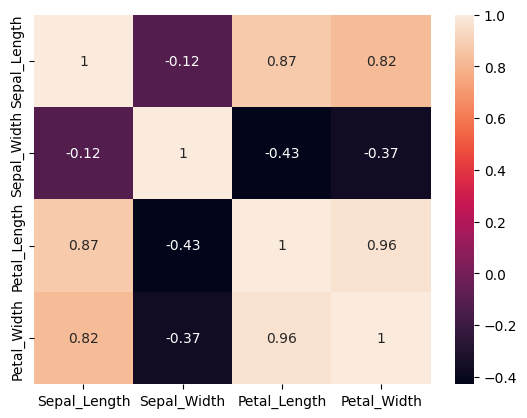

In [20]:
# Grafico de correlacion con seaborn
import seaborn as sns

sns.heatmap(df.corr(numeric_only=True), annot=True)


<Axes: >

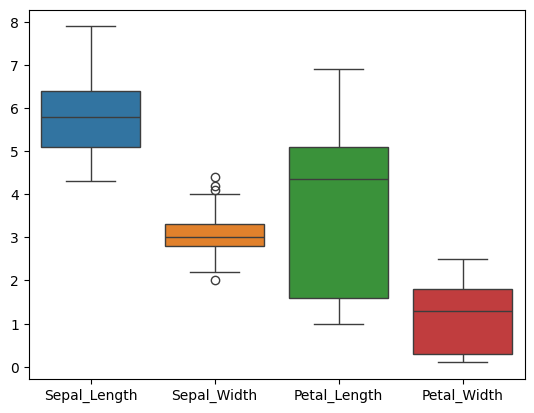

In [21]:
# Boxplot de df

sns.boxplot(data=df)


In [22]:
import matplotlib.pyplot as plt

In [23]:
def boxplot_iris(feature_names, dataset):
    i = 1
    plt.figure(figsize=(11, 9))  # Tamaño de la figura
    for col in feature_names:  # Itera sobre cada nombre de característica
        plt.subplot(2, 2, i)  # Crea una subgráfica en una grilla 2x2
        plt.axis('on')  # Activa los ejes
        plt.tick_params(
            axis='both', left=True,
            top=False, right=False,
            bottom=True, labelleft=False,
            labeltop=False, labelright=False,
            labelbottom=False
        )
        dataset[col].plot(kind='box', subplots=True, sharex=False)  # Boxplot
        plt.title(col)  # Título con el nombre de la característica
        i += 1
    plt.show()  # Muestra todos los gráficos


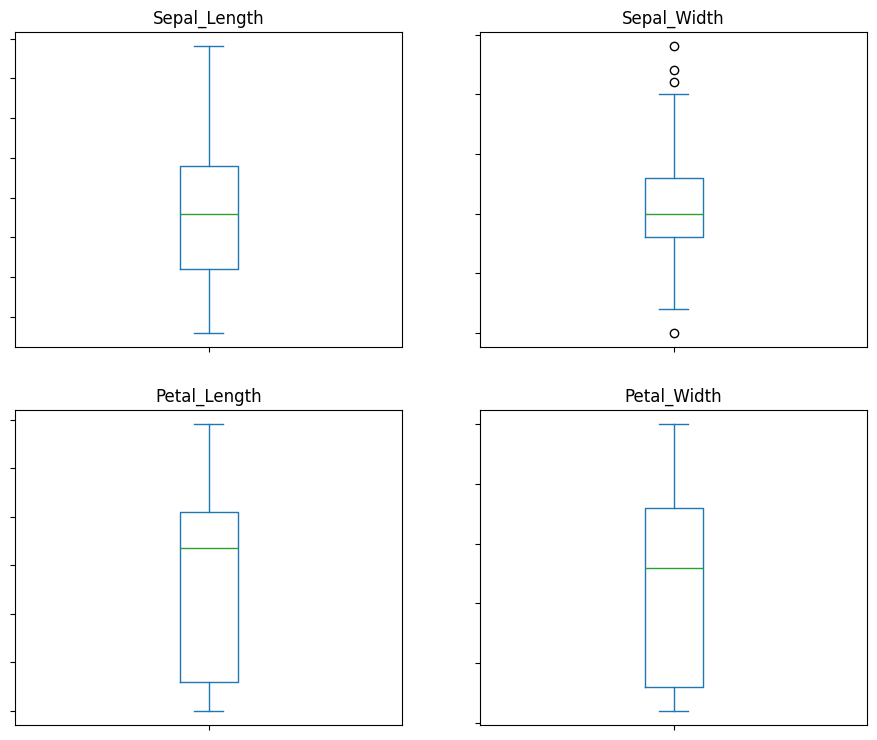

In [24]:
boxplot_iris(df.columns[:-1], df)


In [25]:
def histogram_iris(feature_names, dataset):
    i = 1
    plt.figure(figsize=(11, 2))
    for col in feature_names:
        plt.subplot(1, 4, i)
        plt.axis('on')
        plt.tick_params(axis='both', left=True,
                        top=False, right=False,
                        bottom=True, labelleft=False,
                        labeltop=False, labelright=False,
                        labelbottom=False)

        dataset[col].plot(kind='hist', subplots=True, color="blue", grid=True)
        plt.title(col)
        i += 1
    plt.show()


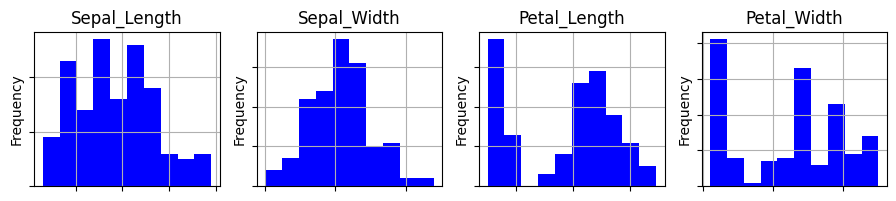

In [26]:
histogram_iris(df.columns[:-1], df)

<Axes: xlabel='Sepal_Length', ylabel='Count'>

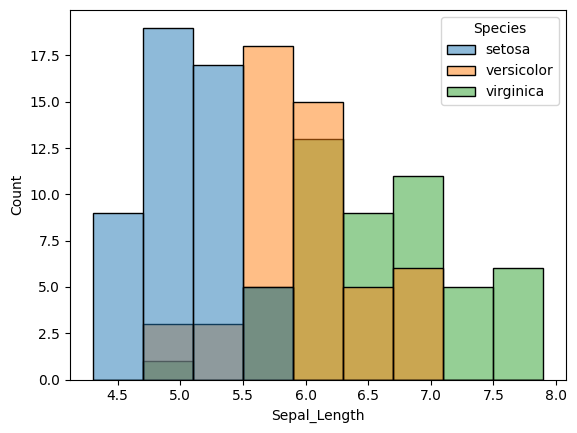

In [27]:
# Histogramas de datos en seaborn
sns.histplot(data=df, x="Sepal_Length", hue="Species")

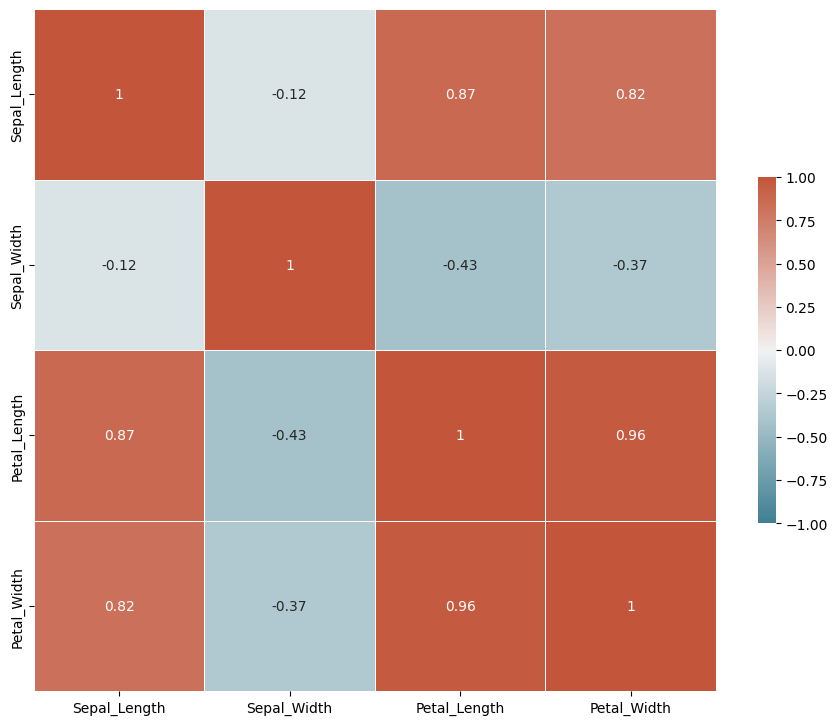

In [28]:
corr = df.corr(numeric_only=True)
cmap = sns.diverging_palette(220, 20, as_cmap=True)
plt.figure(figsize=(11,9))
sns.heatmap(corr, cmap=cmap, vmax=1.0, vmin=-1.0, center=0, square=True,
            linewidths=.5, cbar_kws={"shrink": .5}, annot=True)
plt.show()


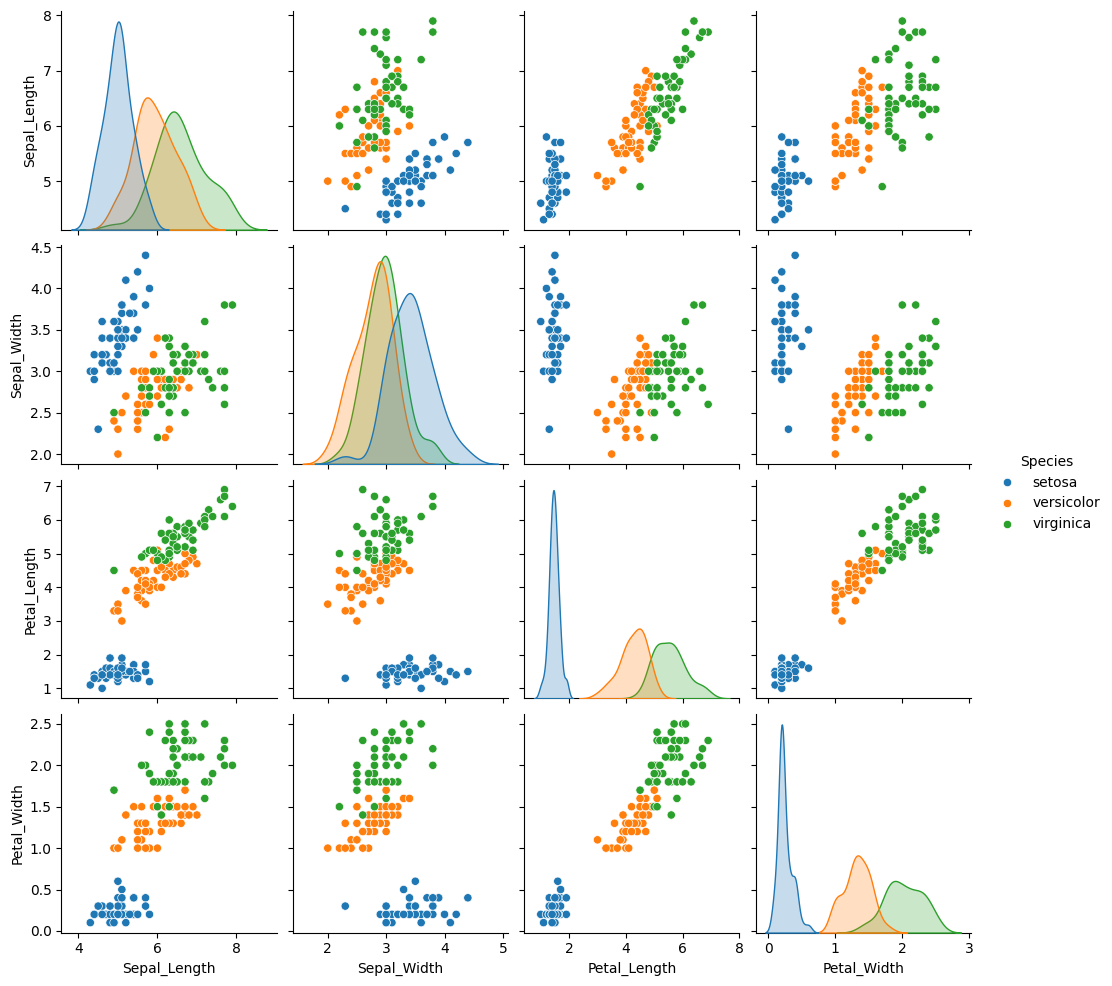

In [29]:
sns.pairplot(df, hue='Species')

In [30]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df.iloc[:, :-1], df.iloc[:, -1],
                                                    test_size=0.33, random_state=42)


In [31]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(criterion='gini', splitter='best', max_depth=None,
                                        min_samples_split=2, min_samples_leaf=1,
                                        min_weight_fraction_leaf=0.0, max_features=None,
                                        random_state=42, max_leaf_nodes=None,
                                        min_impurity_decrease=0.0, class_weight=None)


In [32]:
model

DecisionTreeClassifier(random_state=42)

In [33]:
# Entreno el modelo
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [34]:
model.score(X_test, y_test)

0.98

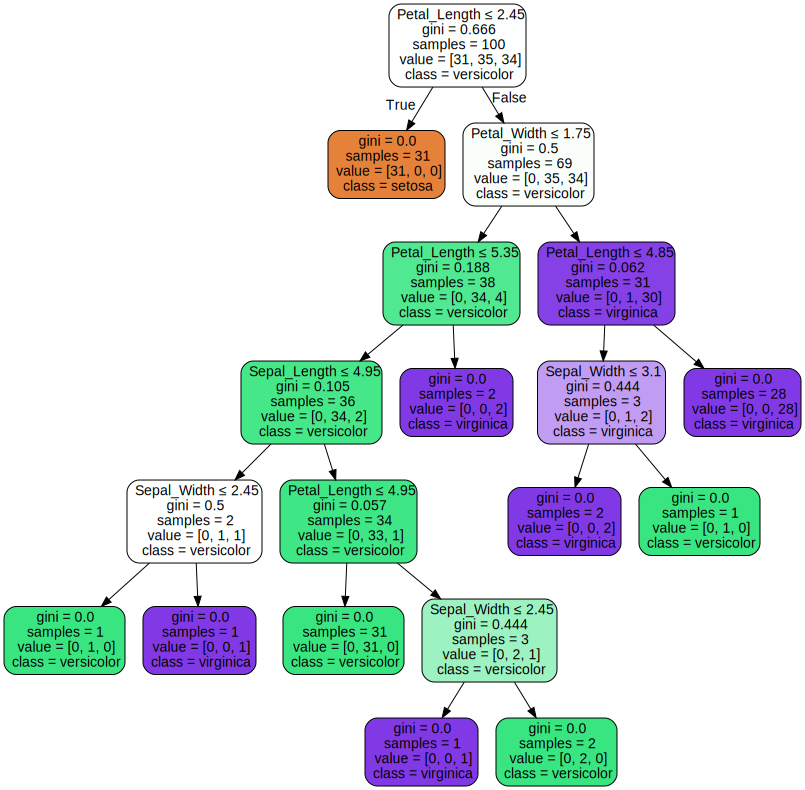

In [35]:
# Gráfico del árbol de decisión
from sklearn.tree import export_graphviz
import graphviz

# Generar datos en formato DOT para visualización
dot_data = export_graphviz(model, out_file=None,
                           feature_names=df.columns[:-1],
                           class_names=model.classes_,  # usa las clases del modelo
                           filled=True, rounded=True,
                           special_characters=True)

# Crear objeto Graphviz desde los datos DOT
graph = graphviz.Source(dot_data)

# Guardar gráfico en archivo PDF
graph.render("iris_decision_tree", format="pdf", cleanup=True)

# Mostrar gráfico en el notebook
graph


In [36]:
import numpy as np
from sklearn.model_selection import cross_val_score, KFold

cv = KFold(n_splits=10, shuffle=True, random_state=42)
results = cross_val_score(model, X_train, y_train, cv=cv)
fin_result = np.mean(results)


In [37]:
for i, _ in enumerate(results):
    print("{}th puntuación de validación cruzada : {}".format(i, _))

print("\nPuntuación final de validación cruzada: {}".format(fin_result))


0th puntuación de validación cruzada : 0.9
1th puntuación de validación cruzada : 1.0
2th puntuación de validación cruzada : 0.8
3th puntuación de validación cruzada : 1.0
4th puntuación de validación cruzada : 0.8
5th puntuación de validación cruzada : 0.9
6th puntuación de validación cruzada : 1.0
7th puntuación de validación cruzada : 0.9
8th puntuación de validación cruzada : 1.0
9th puntuación de validación cruzada : 1.0

Puntuación final de validación cruzada: 0.93


In [38]:
from sklearn.model_selection import StratifiedKFold
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
results = cross_val_score(model, X_train, y_train, cv=cv)
fin_result = np.mean(results)

for i, _ in enumerate(results):
    print("{}th Puntuación de validación cruzada estratificada: {}".format(i, _))

print("\nPuntuación final de validación cruzada estratificada: {}".format(fin_result))


0th Puntuación de validación cruzada estratificada: 0.9
1th Puntuación de validación cruzada estratificada: 0.9
2th Puntuación de validación cruzada estratificada: 0.8
3th Puntuación de validación cruzada estratificada: 0.9
4th Puntuación de validación cruzada estratificada: 1.0
5th Puntuación de validación cruzada estratificada: 1.0
6th Puntuación de validación cruzada estratificada: 0.9
7th Puntuación de validación cruzada estratificada: 0.8
8th Puntuación de validación cruzada estratificada: 1.0
9th Puntuación de validación cruzada estratificada: 1.0

Puntuación final de validación cruzada estratificada: 0.9199999999999999


In [39]:
!pip install --upgrade scipy==1.9.3


![Explicación de curva ROC](https://i0.wp.com/spotintelligence.com/wp-content/uploads/2024/06/roc-curve.jpg)

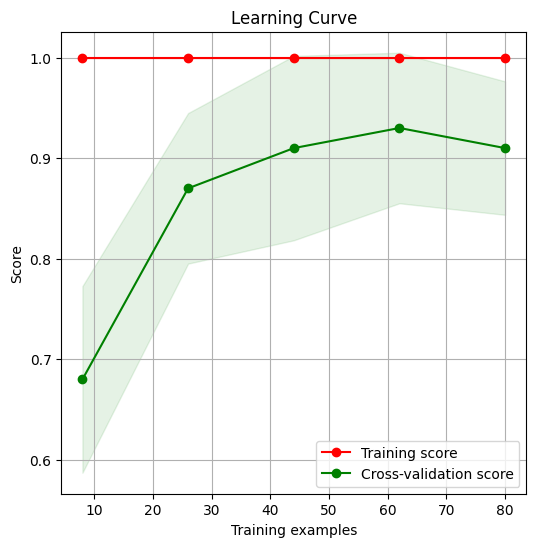

In [40]:
import scikitplot as skplt
import matplotlib.pyplot as plt

skplt.estimators.plot_learning_curve(model,
                                     X_train, y_train,
                                     figsize=(6,6))

plt.show()

TypeError: 'Axes' object is not subscriptable

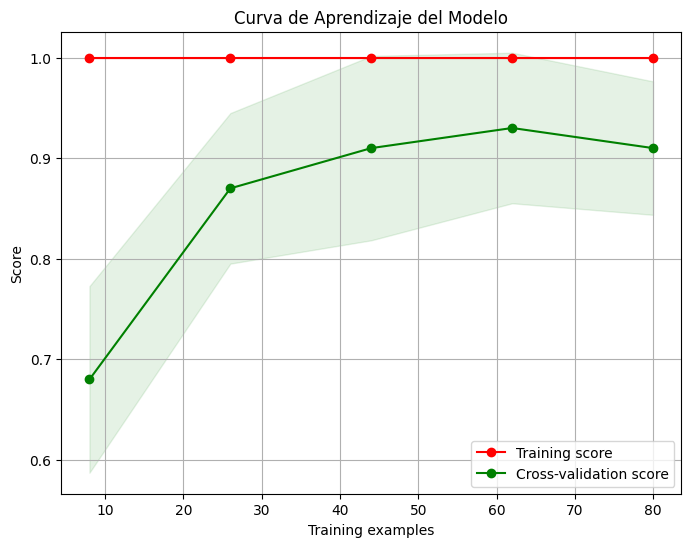

In [41]:
import scikitplot as skplt
import matplotlib.pyplot as plt
import numpy as np

# Graficar curva de aprendizaje
fig, ax = plt.subplots(figsize=(8, 6))

# Usar scikit-plot para graficar
plot_data = skplt.estimators.plot_learning_curve(
    model, X_train, y_train,
    title='Curva de Aprendizaje del Modelo',
    cv=5, scoring='accuracy',  # puedes cambiar a 'f1', 'precision', etc.
    train_sizes=np.linspace(0.1, 1.0, 5),
    ax=ax
)

# Añadir valores como texto a cada punto
train_sizes, train_scores, test_scores = plot_data[1], plot_data[2], plot_data[3]
mean_train = np.mean(train_scores, axis=1)
mean_test = np.mean(test_scores, axis=1)

for i, size in enumerate(train_sizes):
    ax.text(size, mean_train[i]+0.01, f"{mean_train[i]:.2f}", color='blue', ha='center', fontsize=9)
    ax.text(size, mean_test[i]-0.04, f"{mean_test[i]:.2f}", color='orange', ha='center', fontsize=9)

# Personalización adicional
ax.grid(True)
ax.set_ylim(0.0, 1.05)
ax.set_ylabel("Precisión")
ax.set_xlabel("Tamaño del conjunto de entrenamiento")
ax.legend(loc='best')
plt.tight_layout()
plt.show()


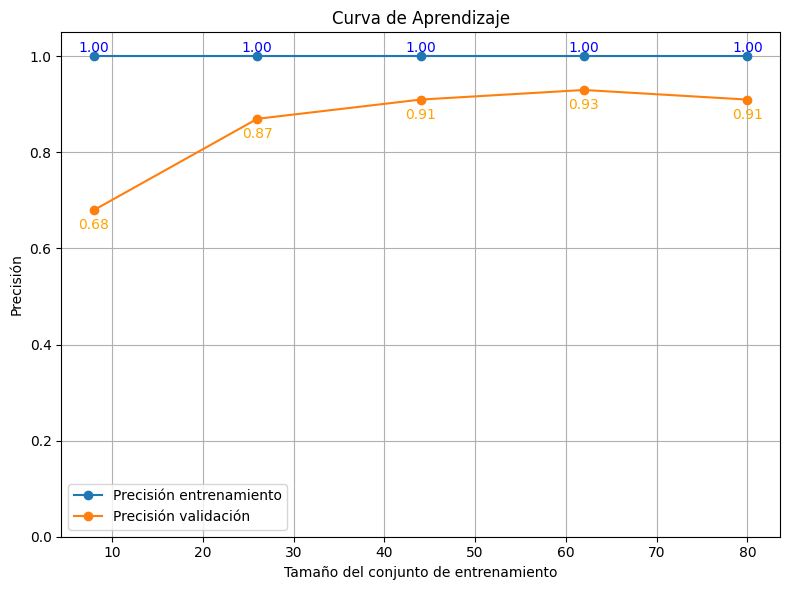

In [42]:
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt
import numpy as np

train_sizes, train_scores, test_scores = learning_curve(
    model, X_train, y_train, cv=5,
    train_sizes=np.linspace(0.1, 1.0, 5),
    scoring='accuracy'
)

train_mean = np.mean(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)

plt.figure(figsize=(8, 6))
plt.plot(train_sizes, train_mean, 'o-', label="Precisión entrenamiento")
plt.plot(train_sizes, test_mean, 'o-', label="Precisión validación")
for i, size in enumerate(train_sizes):
    plt.text(size, train_mean[i]+0.01, f"{train_mean[i]:.2f}", ha='center', color='blue')
    plt.text(size, test_mean[i]-0.04, f"{test_mean[i]:.2f}", ha='center', color='orange')

plt.title("Curva de Aprendizaje")
plt.xlabel("Tamaño del conjunto de entrenamiento")
plt.ylabel("Precisión")
plt.ylim(0.0, 1.05)
plt.grid(True)
plt.legend(loc="best")
plt.tight_layout()
plt.show()


In [43]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, KFold

# Definir el estimador base
estimator = DecisionTreeClassifier()

# Definir el espacio de búsqueda de hiperparámetros
parameters = {
    'max_depth': [4, 6, 8, 10, 12],
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'min_weight_fraction_leaf': [0.0, 0.1, 0.2, 0.3],
    'random_state': [7, 23, 42, 78, 142],
    'min_impurity_decrease': [0.0, 0.05, 0.1, 0.2]
}

# Configurar la búsqueda en malla con validación cruzada
model2 = GridSearchCV(
    estimator=estimator,
    param_grid=parameters,
    cv=KFold(10),
    verbose=1,
    n_jobs=-1,
    refit=True
)

# Ajustar el modelo con los mejores hiperparámetros encontrados
model2.fit(X_train, y_train)


Fitting 10 folds for each of 1600 candidates, totalling 16000 fits


GridSearchCV(cv=KFold(n_splits=10, random_state=None, shuffle=False),
             estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 6, 8, 10, 12],
                         'min_impurity_decrease': [0.0, 0.05, 0.1, 0.2],
                         'min_weight_fraction_leaf': [0.0, 0.1, 0.2, 0.3],
                         'random_state': [7, 23, 42, 78, 142],
                         'splitter': ['best', 'random']},
             verbose=1)

In [44]:
# Mejor estimador encontrado
model2.best_estimator_


DecisionTreeClassifier(max_depth=4, random_state=23, splitter='random')

In [45]:
# Mejores hiperparámetros encontrados
model2.best_params_


{'criterion': 'gini',
 'max_depth': 4,
 'min_impurity_decrease': 0.0,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 23,
 'splitter': 'random'}

In [46]:
# Mejor puntaje promedio de validación cruzada
model2.best_score_


0.9700000000000001

In [47]:
from sklearn.metrics import accuracy_score

# Realizar predicciones sobre el conjunto de prueba
pred = model2.predict(X_test)

# Ver las predicciones
pred


array(['versicolor', 'setosa', 'virginica', 'versicolor', 'versicolor',
       'setosa', 'versicolor', 'virginica', 'versicolor', 'versicolor',
       'virginica', 'setosa', 'setosa', 'setosa', 'setosa', 'versicolor',
       'virginica', 'versicolor', 'versicolor', 'virginica', 'setosa',
       'virginica', 'setosa', 'virginica', 'virginica', 'virginica',
       'virginica', 'virginica', 'setosa', 'setosa', 'setosa', 'setosa',
       'versicolor', 'setosa', 'setosa', 'virginica', 'versicolor',
       'setosa', 'setosa', 'setosa', 'virginica', 'versicolor',
       'versicolor', 'setosa', 'setosa', 'versicolor', 'versicolor',
       'virginica', 'versicolor', 'virginica'], dtype=object)

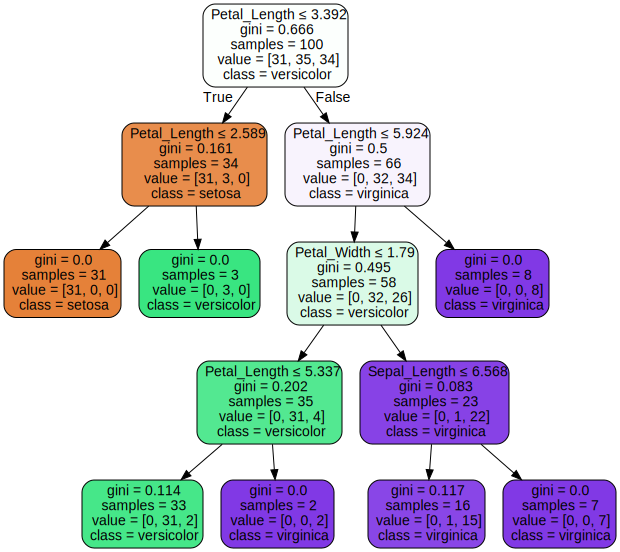

In [53]:
from sklearn.tree import export_graphviz
import graphviz

# Usar el mejor modelo (árbol) encontrado por GridSearchCV
best_model = model2.best_estimator_

# Generar datos en formato DOT
dot_data = export_graphviz(best_model, out_file=None,
                           feature_names=df.columns[:-1],
                           class_names=best_model.classes_,
                           filled=True, rounded=True,
                           special_characters=True)

# Crear y mostrar el gráfico
graph = graphviz.Source(dot_data)
graph.render("iris_best_decision_tree", format="pdf", cleanup=True)
graph


In [48]:
# Calcular y mostrar la precisión del modelo
accuracy_score(y_test, pred)


0.98

In [49]:
# Report de metricas de model2
from sklearn.metrics import classification_report

print(classification_report(y_test, pred))


              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       0.94      1.00      0.97        15
   virginica       1.00      0.94      0.97        16

    accuracy                           0.98        50
   macro avg       0.98      0.98      0.98        50
weighted avg       0.98      0.98      0.98        50



In [50]:
from sklearn.metrics import confusion_matrix

# Realizar predicciones
pred = model2.predict(X_test)

# Calcular la matriz de confusión
confusion_matrix(y_test, pred)


array([[19,  0,  0],
       [ 0, 15,  0],
       [ 0,  1, 15]])

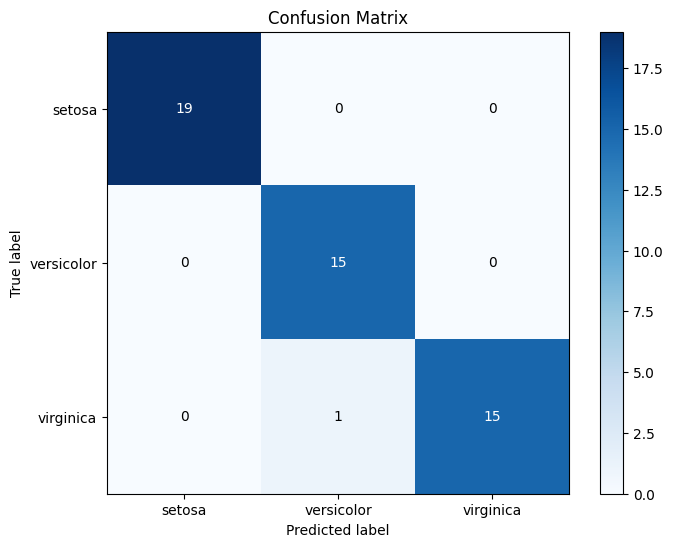

In [51]:
import scikitplot as skplt

skplt.metrics.plot_confusion_matrix(y_test, pred, figsize=(8,6))
plt.show()


Quedamos hasta la 178 luego vienen las métricas

![Matriz de confusión](https://www.researchgate.net/profile/Giandomenico-Mastrantoni/publication/373478856/figure/fig4/AS:11431281184500373@1693380259754/Confusion-matrix-for-binary-classification-where-TP-and-TN-denote-the-number-of-positive.png)

## 📊 Métricas de Clasificación en Machine Learning

Las métricas de clasificación se utilizan para evaluar la calidad de los modelos que predicen **categorías o clases**.

---

### 1. ✅ Accuracy (Precisión global)

> Proporción de predicciones correctas sobre el total.

$$
\text{Accuracy} = \frac{TP + TN}{TP + FP + FN + TN}
$$

✔️ Útil cuando las clases están balanceadas.

---

### 2. 🎯 Precision (Precisión por clase)

> De todas las predicciones positivas, ¿cuántas eran realmente positivas?

$$
\text{Precision} = \frac{TP}{TP + FP}
$$

✔️ Importante cuando el **costo de un falso positivo es alto** (ej. detector de spam).

---

### 3. 🔎 Recall (Sensibilidad / Exhaustividad)

> De todos los positivos reales, ¿cuántos fueron detectados por el modelo?

$$
\text{Recall} = \frac{TP}{TP + FN}
$$

✔️ Importante cuando el **costo de un falso negativo es alto** (ej. diagnóstico de cáncer).

---

### 4. ⚖️ F1-Score

> Media armónica entre precisión y recall.

$$
F1 = 2 \cdot \frac{\text{Precision} \cdot \text{Recall}}{\text{Precision} + \text{Recall}}
$$

✔️ Útil con clases desbalanceadas.

---

### 5. 📋 Matriz de Confusión

> Tabla que resume las predicciones correctas e incorrectas por clase.

|                      | Predicho Positivo | Predicho Negativo |
|----------------------|-------------------|-------------------|
| **Real Positivo**    | TP                | FN                |
| **Real Negativo**    | FP                | TN                |


# 🎯 Ejemplo: Cuando la Accuracy engaña en medicina

Supongamos un modelo que intenta detectar **cáncer**.  
Tenemos el siguiente conjunto de datos:

- Total de pacientes: 1000  
  - 990 están **sanos**  
  - 10 tienen **cáncer**

Ahora entrenamos un modelo que predice que **todos los pacientes están sanos**.

---

## 📊 Matriz de Confusión

|                      | Predicho Sano | Predicho Cáncer |
|----------------------|---------------|------------------|
| **Real Sano**        | 990 (TN)      | 0 (FP)           |
| **Real con Cáncer**  | 10 (FN)       | 0 (TP)           |

---

## 📈 Métricas

- **Accuracy** = (TP + TN) / Total = (0 + 990) / 1000 = **0.99** → **99%**
- **Recall (Sensibilidad)** = TP / (TP + FN) = 0 / (0 + 10) = **0.0**
- **Precision (Valor Predictivo Positivo)** = TP / (TP + FP) = 0 / (0 + 0) = ❌ **Indefinido**
- **F1 Score** = 0 (porque precisión y recall son 0)

---

## ⚠️ Conclusión

Aunque el modelo tiene un **accuracy de 99%**, **no detecta ningún caso de cáncer**.

Este es un caso típico en medicina donde **la accuracy no es una métrica confiable**, especialmente cuando hay **clases desbalanceadas** y lo más importante es **no dejar pasar casos positivos sin detectar** (alta sensibilidad/recall).

👉 En estos casos es mejor usar métricas como:
- `Recall` (sensibilidad)
- `F1 Score`
- `AUC-ROC` o `AUC-PR`


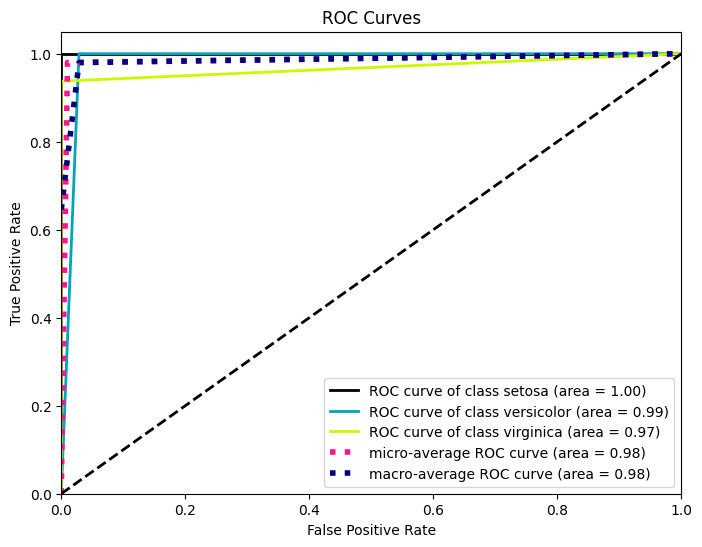

In [58]:
import scikitplot as skplt

pred_proba = model.predict_proba(X_test)
skplt.metrics.plot_roc(y_test, pred_proba, figsize=(8,6))

plt.show()


In [ ]:
import pickle

# Guardar el modelo entrenado en un archivo
with open('final_model.pickle', 'wb') as fp:
    pickle.dump(model2, fp)

# Cargar el modelo desde el archivo
f = open('final_model.pickle', 'rb')
model3 = pickle.load(f)

# Predecir usando el modelo cargado
predicted_species = model3.predict(df.iloc[:, :-1])

# Guardar las predicciones en el DataFrame original
iris['predicted_species'] = predicted_species

# Exportar a CSV
iris.to_csv('FinalResult.csv', index=False)


In [54]:
# Prueba el proceso con el siguiente dataset

!wget https://raw.githubusercontent.com/davidlealo/tallermodelossupervisados/refs/heads/main/data/Lluvia_full.csv

--2025-07-05 13:53:19--  https://raw.githubusercontent.com/davidlealo/tallermodelossupervisados/refs/heads/main/data/Lluvia_full.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.108.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5978975 (5.7M) [text/plain]
Saving to: ‘Lluvia_full.csv’

Lluvia_full.csv     100%[===================>]   5.70M  --.-KB/s    in 0.05s   

2025-07-05 13:53:19 (113 MB/s) - ‘Lluvia_full.csv’ saved [5978975/5978975]



# Llegamos hasta la 194